# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Dataset

In [ ]:
# df = pd.read_csv('/Users/yvonne013/Desktop/COMP5310 Principles of Data Science/heart_2020_cleaned.csv')
df = pd.read_excel('HeartDisease-cleaned.xlsx')
df = df.drop(columns=["KidneyDisease","SkinCancer"])
df = df[df.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })
df['Diabetic'] = df['Diabetic'].astype(int)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma
0,0,16.60,1,0,0,3,30,0,0,55-59,White,1,1,Very good,5,1
1,0,20.34,0,0,1,0,0,0,0,80 or older,White,0,1,Very good,7,0
2,0,26.58,1,0,0,20,30,0,1,65-69,White,1,1,Fair,8,1
3,0,24.21,0,0,0,0,0,0,0,75-79,White,0,0,Good,6,0
4,0,23.71,0,0,0,28,0,1,0,40-44,White,0,1,Very good,8,0


In [ ]:
#Data Preprocessing
#Select Features
features = df.drop(columns =['HeartDisease'], axis = 1)

#Select Target 
target = df['HeartDisease']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size = .33, random_state = 20)


print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (214262, 16)
Shape of testing feature: (105533, 16)
Shape of training label: (214262,)
Shape of training label: (105533,)


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
transformer = make_column_transformer(
    (OneHotEncoder(sparse=False), ['AgeCategory', 'Race', 'GenHealth']),
    remainder='passthrough')

# Encode training data 
transformed_train = transformer.fit_transform(X_train)
transformed_train_data = pd.DataFrame(transformed_train, columns=transformer.get_feature_names())

# Concat the two tables
transformed_train_data.reset_index(drop=True, inplace=True)
X_train.reset_index(drop=True, inplace=True)
X_train = pd.concat([transformed_train_data, X_train], axis=1)

# Remove old columns
X_train.drop(['AgeCategory', 'Race', 'GenHealth'], axis = 1, inplace = True)

# Encode test data 
transformed_test = transformer.fit_transform(X_test)
transformed_test_data = pd.DataFrame(transformed_test, columns=transformer.get_feature_names())

# Concat the two tables
transformed_test_data.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
X_test = pd.concat([transformed_test_data, X_test], axis=1)


# Remove old columns
X_test.drop(['AgeCategory', 'Race', 'GenHealth'], axis = 1, inplace = True)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
scaler = StandardScaler()

# Scale trainint data
X_train = scaler.fit_transform(X_train)

# Scale test data
X_test = scaler.fit_transform(X_test)

# Evaluation

In [ ]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [ ]:
X_train

array([[-0.26613554, -0.23657304, -0.24983508, ...,  0.53929937,
         0.63054373, -0.39233312],
       [-0.26613554, -0.23657304, -0.24983508, ...,  0.53929937,
         0.63054373, -0.39233312],
       [-0.26613554, -0.23657304, -0.24983508, ...,  0.53929937,
         0.63054373, -0.39233312],
       ...,
       [-0.26613554, -0.23657304, -0.24983508, ...,  0.53929937,
         0.63054373, -0.39233312],
       [-0.26613554, -0.23657304, -0.24983508, ..., -1.8542577 ,
        -1.4619562 , -0.39233312],
       [-0.26613554, -0.23657304, -0.24983508, ...,  0.53929937,
        -0.06695625, -0.39233312]])

# K Nearest Neighbours

In [ ]:
# Building a model using KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)


# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.9050533956203273
Precision: 0.3675115207373272
Recall: 0.1402197802197802
F1 Score: 0.20299077314667513
Cohens Kappa Score: 0.16313282077667035
Area Under Curve: 0.7172520299067747
Confusion Matrix:
 [[94237  2196]
 [ 7824  1276]]


## Hyperparameter Tuning for KNN

In [ ]:
knn_model = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

# defining parameter range
grid = GridSearchCV(knn_model, param_grid, cv=10, scoring='accuracy', 
                    return_train_score=False,verbose=1)

In [ ]:
# fitting the model for grid search
grid_search = grid.fit(X_2d_train, y_train_2d)

# print best parameter after tuning
tmp_best_para = grid.best_params_
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

In [ ]:
grid_predictions = grid.predict(X_2d_valid)
  
# print classification report
print(classification_report(y_valid_2d, grid_predictions))

## Fitting Optimised KNN

In [ ]:
# KNN
best_k = 4
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_2d_train, y_train_2d)
y_pred = knn_best.predict(X_2d_valid)
print("Accuracy on test set: {:.4f}".format(
    accuracy_score(y_valid_2d, y_pred)))

# Random Forest

In [ ]:
# Building Radom forest model  
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42,n_estimators=10,max_depth=4, class_weight='balanced')
rf.fit(X_train,y_train)
rf.estimators_[0]
sample_tree=rf.estimators_[4]
rf_eval = evaluate_model(rf, X_test, y_test)
# Print result
print('Accuracy:', rf_eval ['acc'])
print('Precision:', rf_eval ['prec'])
print('Recall:', rf_eval ['rec'])
print('F1 Score:', rf_eval ['f1'])
print('Cohens Kappa Score:', rf_eval ['kappa'])
print('Area Under Curve:', rf_eval ['auc'])
print('Confusion Matrix:\n', rf_eval ['cm'])


Accuracy: 0.9140647948982783
Precision: 0.7066666666666667
Recall: 0.005824175824175824
F1 Score: 0.011553133514986377
Cohens Kappa Score: 0.01015771559274814
Area Under Curve: 0.7954292674649813
Confusion Matrix:
 [[96411    22]
 [ 9047    53]]


In [ ]:
# Hyperparameer tuning for random forest
max_depth = [2,8,16]
n_estimators = [64, 128, 256]
param_grid = dict(max_depth = max_depth, n_estimators=n_estimators)

# Building grid search
rf_model = RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth, class_weight='balanced')
grid = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs = -1)
grid_result = grid.fit(X_train, y_train)

# best param
print(grid_result.best_params_)

{'max_depth': 16, 'n_estimators': 256}


In [ ]:
# Building best model
best_depth = 16 #obtained from gridsearch
best_n_estimator = 256 #obtained from gridsearch

rf_best =  RandomForestClassifier(random_state=42, n_estimators=best_n_estimator,  max_depth= best_depth, class_weight='balanced')

rf_best.fit(X_train, y_train)
rf_best.estimators_[0]

sample_tree=rf_best.estimators_[4]
rf_eval = evaluate_model(rf_best, X_test, y_test)
# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

Accuracy: 0.811746088901102
Precision: 0.2557506465223901
Recall: 0.6194505494505494
F1 Score: 0.3620307633023988
Cohens Kappa Score: 0.27333192670413786
Area Under Curve: 0.8243560557845605
Confusion Matrix:
 [[80029 16404]
 [ 3463  5637]]


# Decision Tree

In [ ]:
# Building Decision Tree model 
dt = tree.DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

# Evaluate Model
dt_eval = evaluate_model(dt, X_test, y_test)

# Print result
print('Accuracy:', dt_eval['acc'])
print('Precision:', dt_eval['prec'])
print('Recall:', dt_eval['rec'])
print('F1 Score:', dt_eval['f1'])
print('Cohens Kappa Score:', dt_eval['kappa'])
print('Area Under Curve:', dt_eval['auc'])
print('Confusion Matrix:\n', dt_eval['cm'])

Accuracy: 0.861882065325538
Precision: 0.2271277655969703
Recall: 0.25043956043956045
F1 Score: 0.23821469635204348
Cohens Kappa Score: 0.1624700816234398
Area Under Curve: 0.5850105157563704
Confusion Matrix:
 [[88678  7755]
 [ 6821  2279]]


In [ ]:
# Logistic Regression 
lg = LogisticRegression()
lg .fit(X_train, y_train)

# Evaluate Model
lg_eval = evaluate_model(lg, X_test, y_test)

# Print result
print('Accuracy:', lg_eval['acc'])
print('Precision:', lg_eval['prec'])
print('Recall:',lg_eval['rec'])
print('F1 Score:', lg_eval['f1'])
print('Cohens Kappa Score:', lg_eval['kappa'])
print('Area Under Curve:', lg_eval['auc'])
print('Confusion Matrix:\n', lg_eval['cm'])

Accuracy: 0.9150407929273308
Precision: 0.5424050632911392
Recall: 0.09417582417582418
F1 Score: 0.1604868913857678
Cohens Kappa Score: 0.13850725193092928
Area Under Curve: 0.8406790480163704
Confusion Matrix:
 [[95710   723]
 [ 8243   857]]


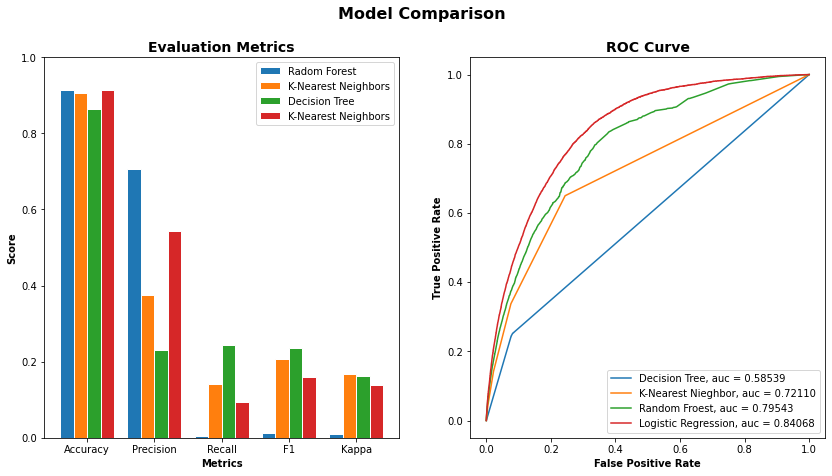

In [ ]:
#Comparison
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
dt_score = [dt_eval['acc'], dt_eval['prec'], dt_eval['rec'], dt_eval['f1'], dt_eval['kappa']]
lg_score = [lg_eval['acc'], lg_eval['prec'], lg_eval['rec'], lg_eval['f1'], lg_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(rf_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

## Make the plot
ax1.bar(r1, rf_score, width=barWidth, edgecolor='white', label='Radom Forest ')
ax1.bar(r2, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax1.bar(r3, dt_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r4, lg_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dt_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dt_eval['fpr'], dt_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dt_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Froest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(lg_eval['fpr'], lg_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(lg_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()